# Submission 02 -- Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
df = pd.read_csv('../datasets/data_fillna.csv')

df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [9]:
df.select_dtypes(include='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Central Air', 'Electrical', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Paved Drive', 'Fence',
       'Misc Feature', 'Sale Type'],
      dtype='object')

In [10]:
plt.figure(figsize=(7,200))
corr = pd.get_dummies(df,columns=df.select_dtypes(include='object').columns).corr()

<Figure size 504x14400 with 0 Axes>

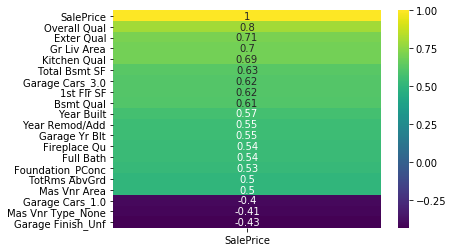

In [11]:
sns.heatmap(corr.loc[~corr['SalePrice'].between(-0.4,0.5),['SalePrice']].sort_values(by='SalePrice',ascending=False)
            ,cmap='viridis'
            ,annot=True
           )

In [12]:
features = corr.loc[~corr['SalePrice'].between(-0.4,0.5),['SalePrice']].index.values
features

array(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplace Qu', 'Garage Yr Blt', 'SalePrice', 'Mas Vnr Type_None',
       'Foundation_PConc', 'Garage Finish_Unf', 'Garage Cars_1.0',
       'Garage Cars_3.0'], dtype=object)

## Second Attempt:
After dummying every column, we are going to take anything NOT between -0.40 and 0.5 in correlation.
We will create a function that will build us an X and y variable that will format our train data and our test data.

In [13]:
def fix_data_get_X_y(csv,features,model=None,test=False):
    df = pd.read_csv(csv)
    
    adj_df = pd.get_dummies(df,columns=df.select_dtypes(include='object').columns)
    for col in features:
        if col in adj_df.columns:
            pass
        else:
            adj_df[col] = 0
            
    X = adj_df[features].drop(columns='SalePrice')
    
    if test:
        y = model.predict(X)
    else:
        y = df['SalePrice']
    return adj_df, X, y

In [14]:
train, X, y = fix_data_get_X_y('datasets/data_fillna.csv',features)
X.head(), y.head()

FileNotFoundError: [Errno 2] File b'datasets/data_fillna.csv' does not exist: b'datasets/data_fillna.csv'

In [15]:
lr = LinearRegression()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

NameError: name 'X' is not defined

In [ ]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
def create_submission(model=lr,feat=features,test_name='sub_02'):
    
    df, X_test, y_test = fix_data_get_X_y('./datasets/test_fillna.csv',feat,model=model,test=True)
    print(X_test.columns)
    df['SalePrice'] = y_test
    submission = df[['Id','SalePrice']]
    
    submission.to_csv(f'./datasets/{test_name}.csv',index=False)
    return submission.shape

In [ ]:
create_submission(lr,features,'sub_02')

[[1.00000000e+00 6.00000000e+00 4.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.35895450e+09]
 [1.00000000e+00 7.00000000e+00 4.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.80278298e+09]
 [1.00000000e+00 5.00000000e+00 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.12945882e+10]
 ...
 [1.00000000e+00 6.00000000e+00 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.44513530e+11]
 [1.00000000e+00 4.00000000e+00 3.00000000e+00 ... 4.89515625e+10
  1.92542812e+10 7.57335062e+09]
 [1.00000000e+00 7.00000000e+00 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.76215137e+11]]


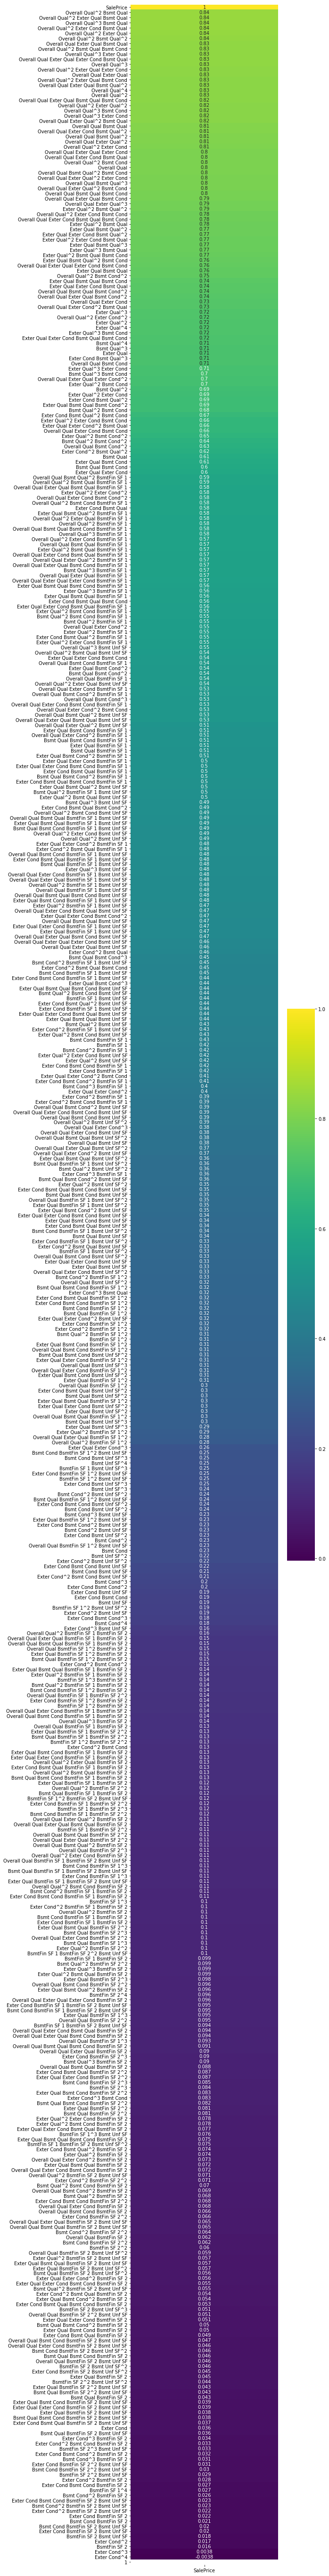

In [60]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
poly = PolynomialFeatures(degree=3)

df.select_dtypes(include='number').columns

features = ['Overall Qual','Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF']
X_train = poly.fit_transform(df[features])

print(X_train)

data = pd.DataFrame(X_train,columns=poly.get_feature_names(features))

data['SalePrice'] = df['SalePrice']

plt.figure(figsize=(7,100))
sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
            ,annot=True
            ,cmap='viridis')

